# Câu 3

## 3a

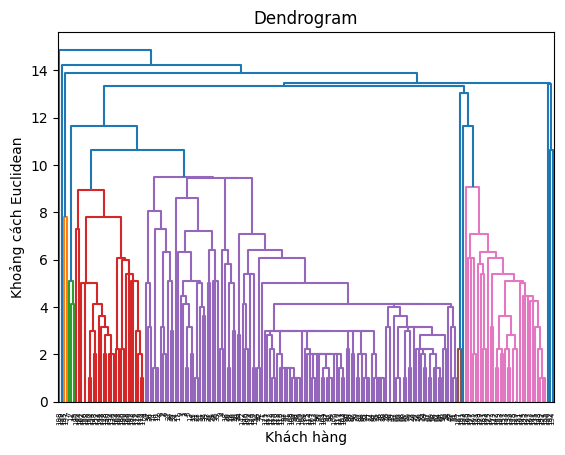

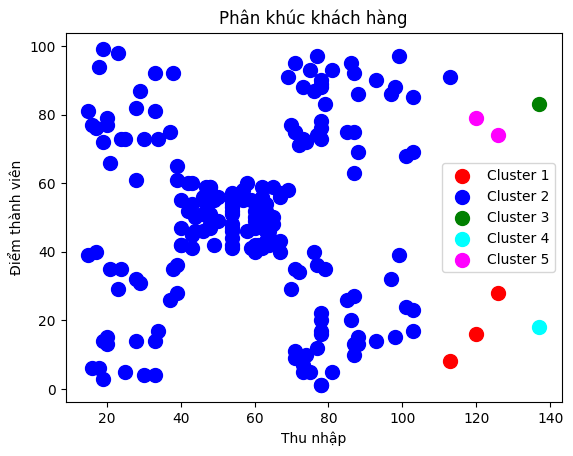

In [1]:
# Nạp các gói thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')
# Lấy dữ liệu thu nhập hằng năm (Annual Income) và điểm thành viên (Spending Score) để phân lớp
X = df.iloc[:, [3, 4]].values
#print(X)
# 2. Tiến hành gom nhóm
# Khi tiến hành các giải thuật để gom nhóm,
# câu hỏi đặt ra là với dataset đã có,
# chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?
# Trong ví dụ này chúng ta sẽ sử dụng Dendrogram để xác định số cụm.
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Khách hàng')
plt.ylabel('Khoảng cách Euclidean')
plt.show()
# Qua đồ thị Dendrogram, chúng ta thấy số cụm tối ưu có khả năng là 5 cụm
# Chúng ta tiến hành gom cụm với số cụm là 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage =
'single')
y_hc = hc.fit_predict(X)
# Hiển thị các cụm dữ liệu
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label =
'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label =
'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label =
'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label =
'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label =
'Cluster 5')
plt.title('Phân khúc khách hàng')
plt.xlabel('Thu nhập')
plt.ylabel('Điểm thành viên')
plt.legend()
plt.show()

## 3c

Text(0.5, 1.0, 'MeanShift')

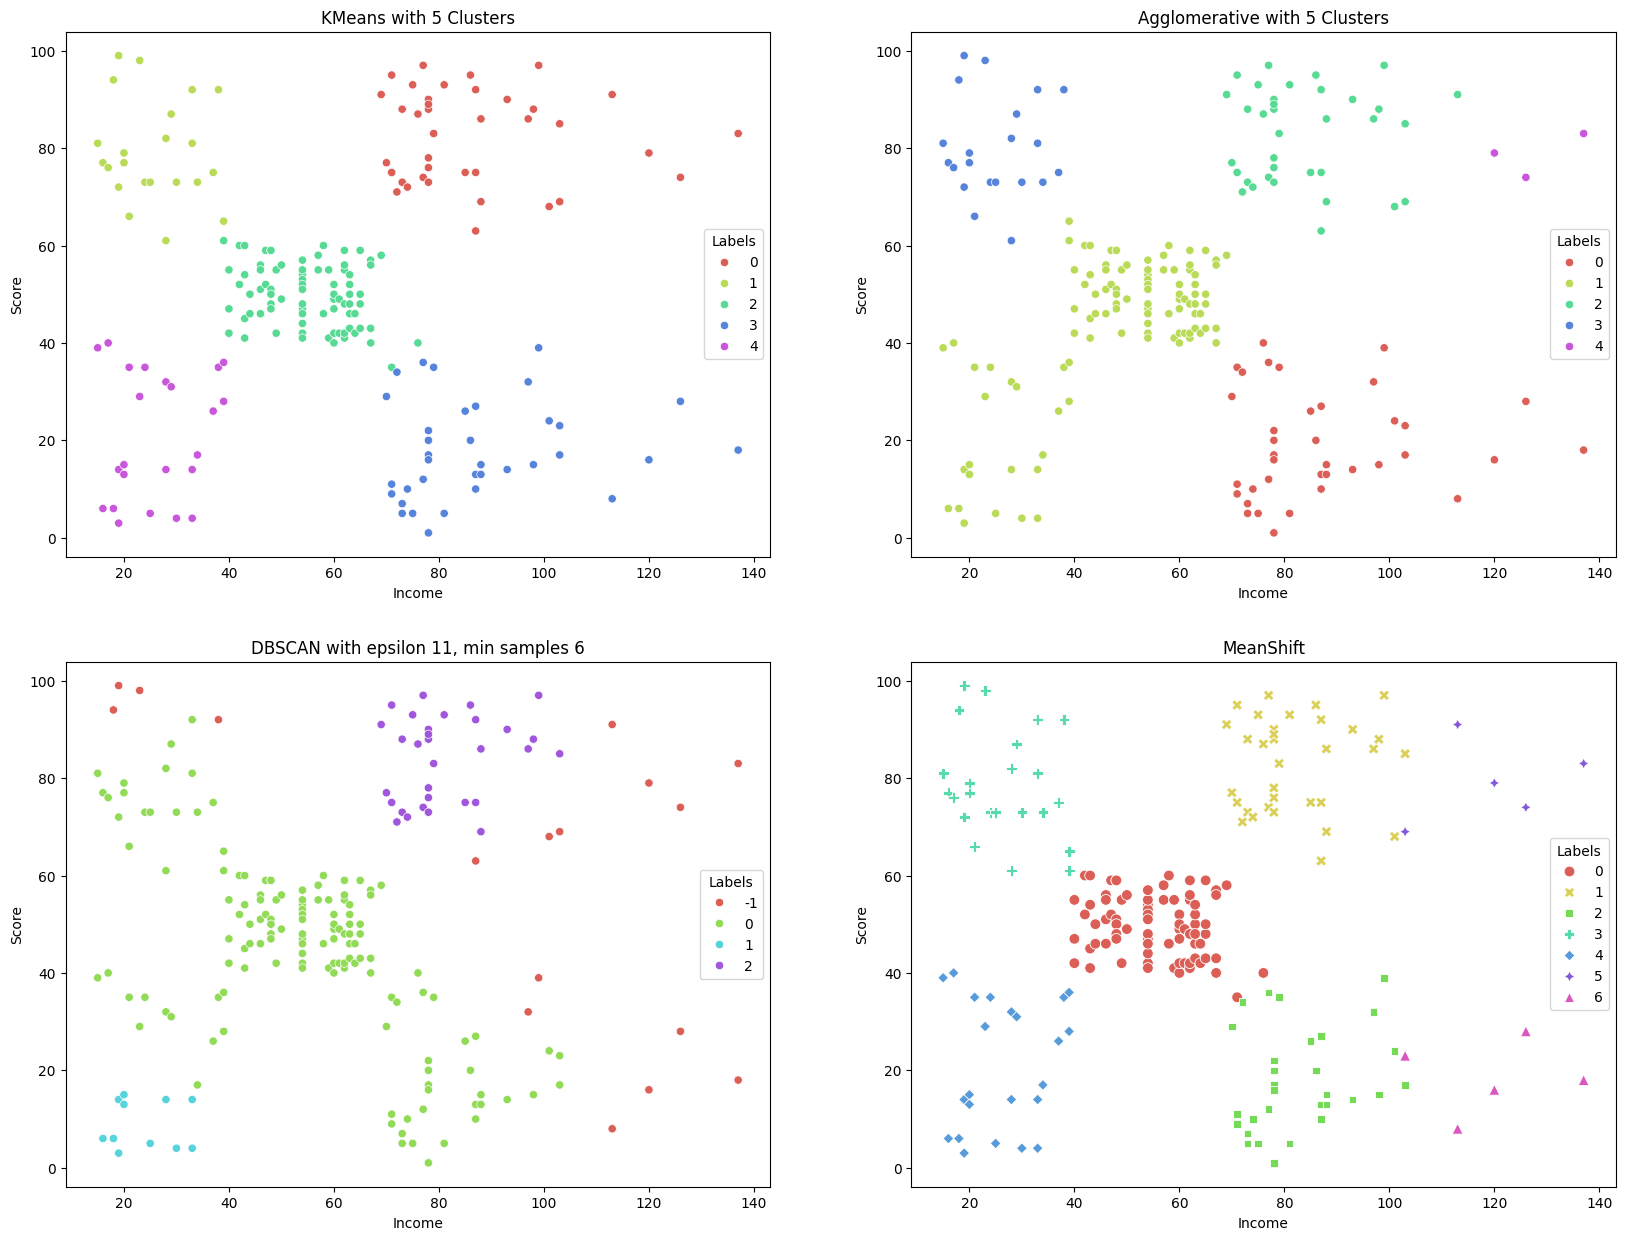

In [2]:
# Yêu cầu: hãy gom nhóm tập khách hàng sau của công ty bán lẻ ABC dựa trên
# (i) thu nhập hằng năm (Annual Income) và điểm thành viên (Spending Score)
# Ghi chú: học viên cần xem thêm tài liệu của các thư viện để hiểu rõ các
# thông số của giải thuật
# Nạp các gói thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')
# Chuẩn hóa tên cột
df.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'},inplace=True)
# Lấy dữ liệu thu nhập hằng năm (Annual Income)
# và điểm thành viên (Spending Score) để phân lớp
X = df.loc[:, ('Income', 'Score')]
# 2. Khởi tạo đồ thị
fig = plt.figure(figsize=(20,15))
# 3. Tiến hành gom nhóm
# 3.1. Sử dụng kmeans
from sklearn.cluster import KMeans
km5 = KMeans(n_clusters=5).fit(X)
# Vẽ biểu đồ
X['Labels'] = km5.labels_
ax = fig.add_subplot(221)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
palette=sns.color_palette('hls', 5))
ax.set_title('KMeans with 5 Clusters')
# 3.2. Sử dụng giải thuật Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
# Vẽ biểu đồ
X['Labels'] = agglom.labels_
ax = fig.add_subplot(222)
sns.scatterplot(x=X['Income'], y=X['Score'],

hue=X['Labels'],

palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative with 5 Clusters')
# 3.3. Sử dụng giải thuật DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=11, min_samples=6).fit(X)
# Vẽ biểu đồ
ax = fig.add_subplot(223)
X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'],

hue=X['Labels'],

palette=sns.color_palette('hls',
np.unique(db.labels_).shape[0]))
ax.set_title('DBSCAN with epsilon 11, min samples 6')
# 3.4. Sử dụng giải thuật MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
ax = fig.add_subplot(224)
sns.scatterplot(x=X['Income'], y=X['Score'],

hue=X['Labels'],
style=X['Labels'],
s=60,

palette=sns.color_palette('hls',
np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')